In [1]:
import sklearn 
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import numpy 
print('The scikit-learn version is {}.'.format(numpy.__version__))
import scipy 
print('The scikit-learn version is {}.'.format(scipy.__version__))
import joblib 
print('The scikit-learn version is {}.'.format(joblib.__version__))

The scikit-learn version is 0.21.2.
The scikit-learn version is 1.16.4.
The scikit-learn version is 1.3.0.
The scikit-learn version is 0.13.2.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier   
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [3]:
df = pd.read_csv("../input/heart.csv")

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# renaming column names to be more interpretable 

updated_cols = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'SerumCholestoral', 'FastingBloodSugar', 'RestingECG', 
               'MaxHeartRate', 'ExeriseEnducedAngina', 'OldPeak', 'SlopeOldPeak', 'MajorVessels', 'Thal', 'Output']
df.columns = updated_cols
df.to_csv("..heart1.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,SerumCholestoral,FastingBloodSugar,RestingECG,MaxHeartRate,ExeriseEnducedAngina,OldPeak,SlopeOldPeak,MajorVessels,Thal,Output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values  

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

**1. Decision Tree. CART Algorithm**

In [8]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 15):  
    clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=i, min_samples_split=2,
                                  min_samples_leaf=1, random_state=0)
    clf.fit(X_train, y_train)
    pred_i = clf.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

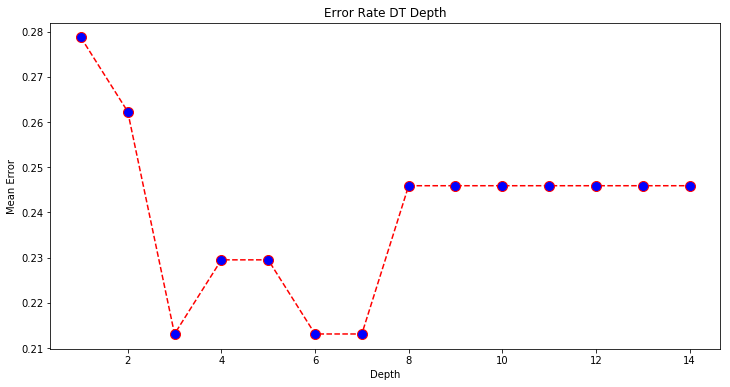

In [9]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate DT Depth')  
plt.xlabel('Depth')  
plt.ylabel('Mean Error')  

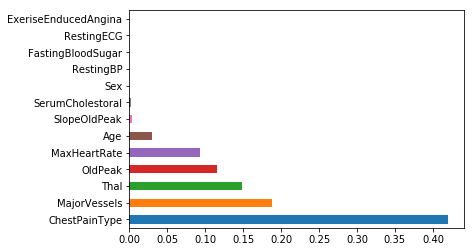

In [10]:
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, min_samples_split=2,
                                  min_samples_leaf=1, random_state=0)
clf = clf.fit(X_train, y_train )
(pd.Series(clf.feature_importances_, index=df.columns[:-1]).nlargest(13).plot(kind='barh'))

In [11]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot', feature_names = df.columns[:-1],
                class_names = df.columns[-1],
                rounded = True, proportion = False, precision = 2, filled = True)

In [12]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


0

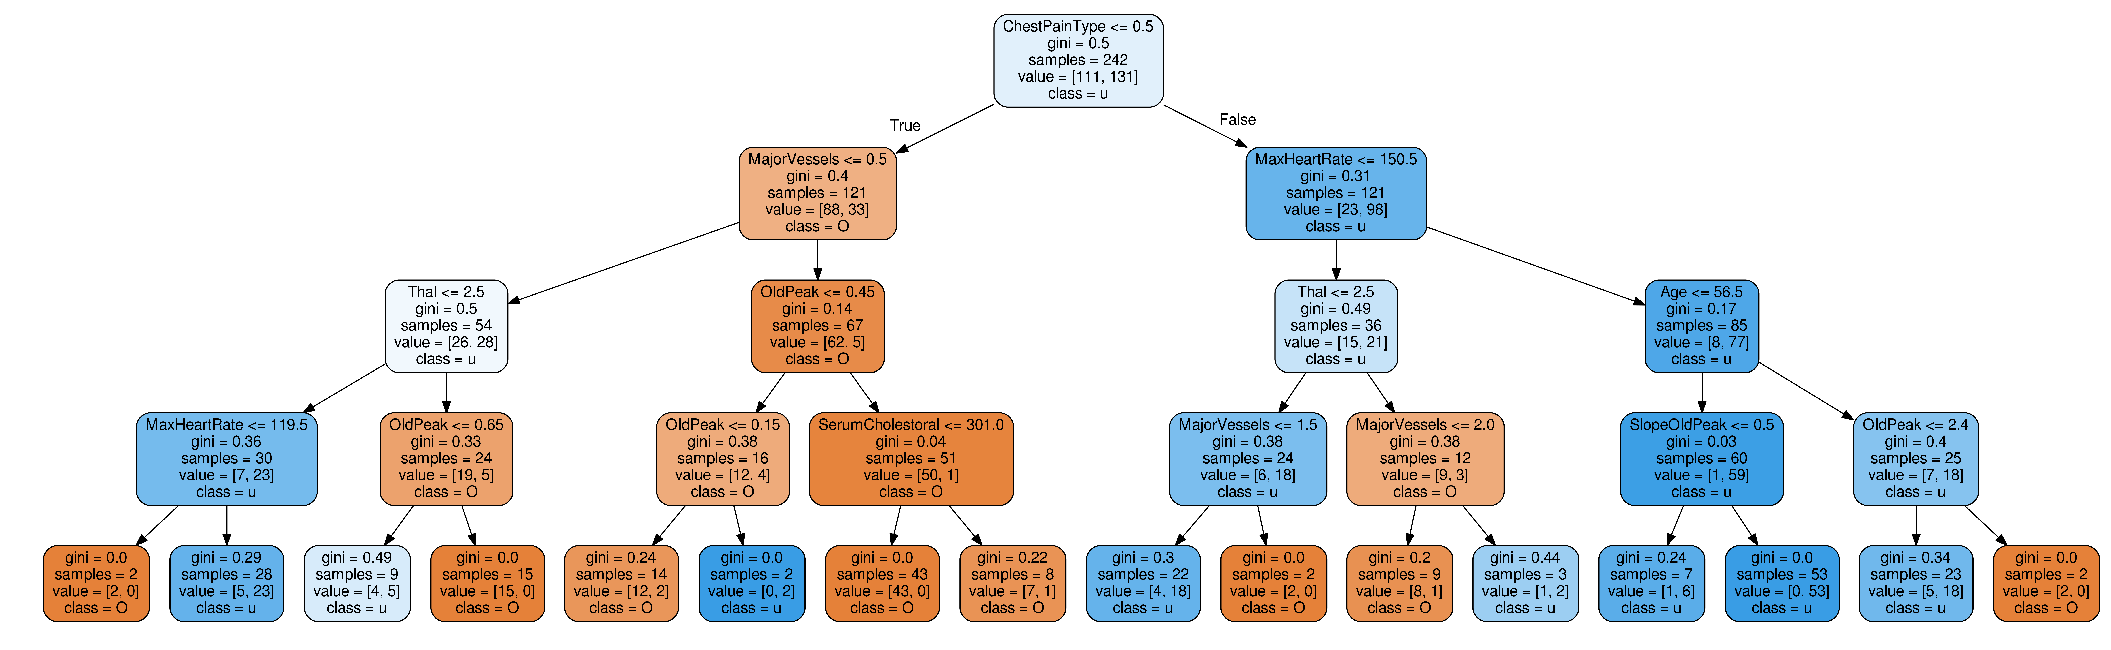

In [13]:
# Display in python
plt.figure(figsize = (37, 45))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

In [14]:
plt.savefig('tree.png')

<Figure size 432x288 with 0 Axes>

In [15]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7704918032786885

**2. K-NN**


In [16]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)  
X_test_s = scaler.transform(X_test)  

In [17]:
classifier = KNeighborsClassifier(n_neighbors=4)  
classifier.fit(X_train_s, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [18]:
y_pred = classifier.predict(X_test_s)  

In [19]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[23  4]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [20]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_s, y_train)
    pred_i = knn.predict(X_test_s)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

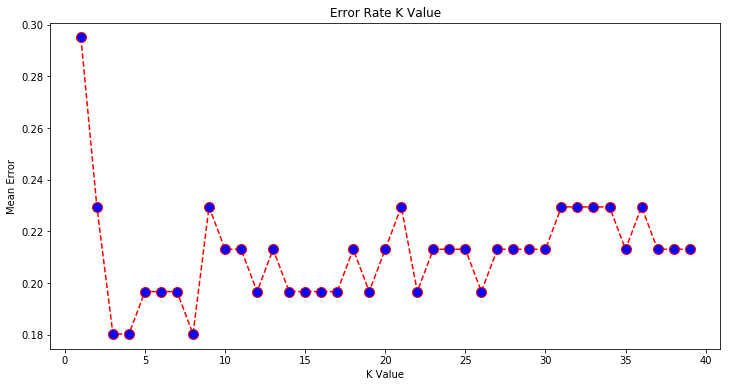

In [21]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

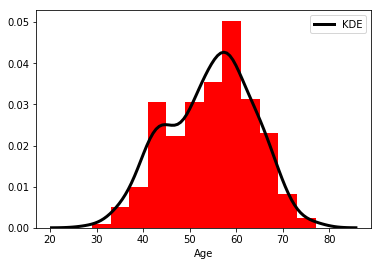

In [22]:
sns.distplot(df['Age'],color='Red',hist_kws={'alpha':1,"linewidth": 2}, kde_kws={"color": "k", "lw": 3, "label": "KDE"})

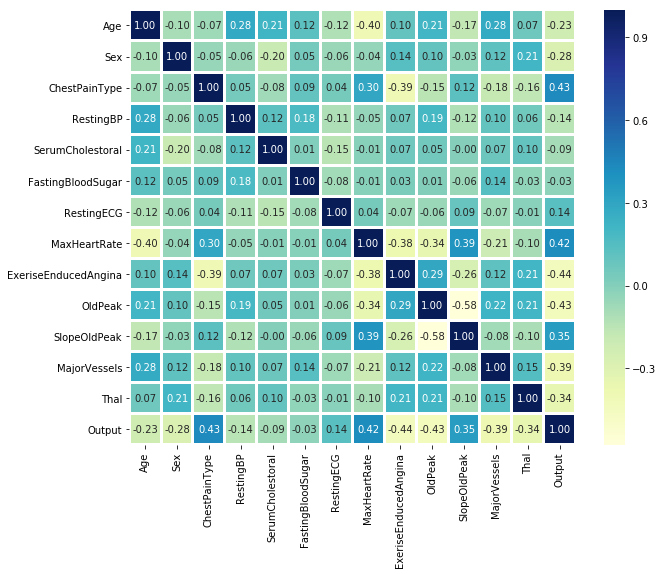

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2f',linewidths=2)

LinAlgError: singular matrix

<Figure size 2160x1080 with 0 Axes>

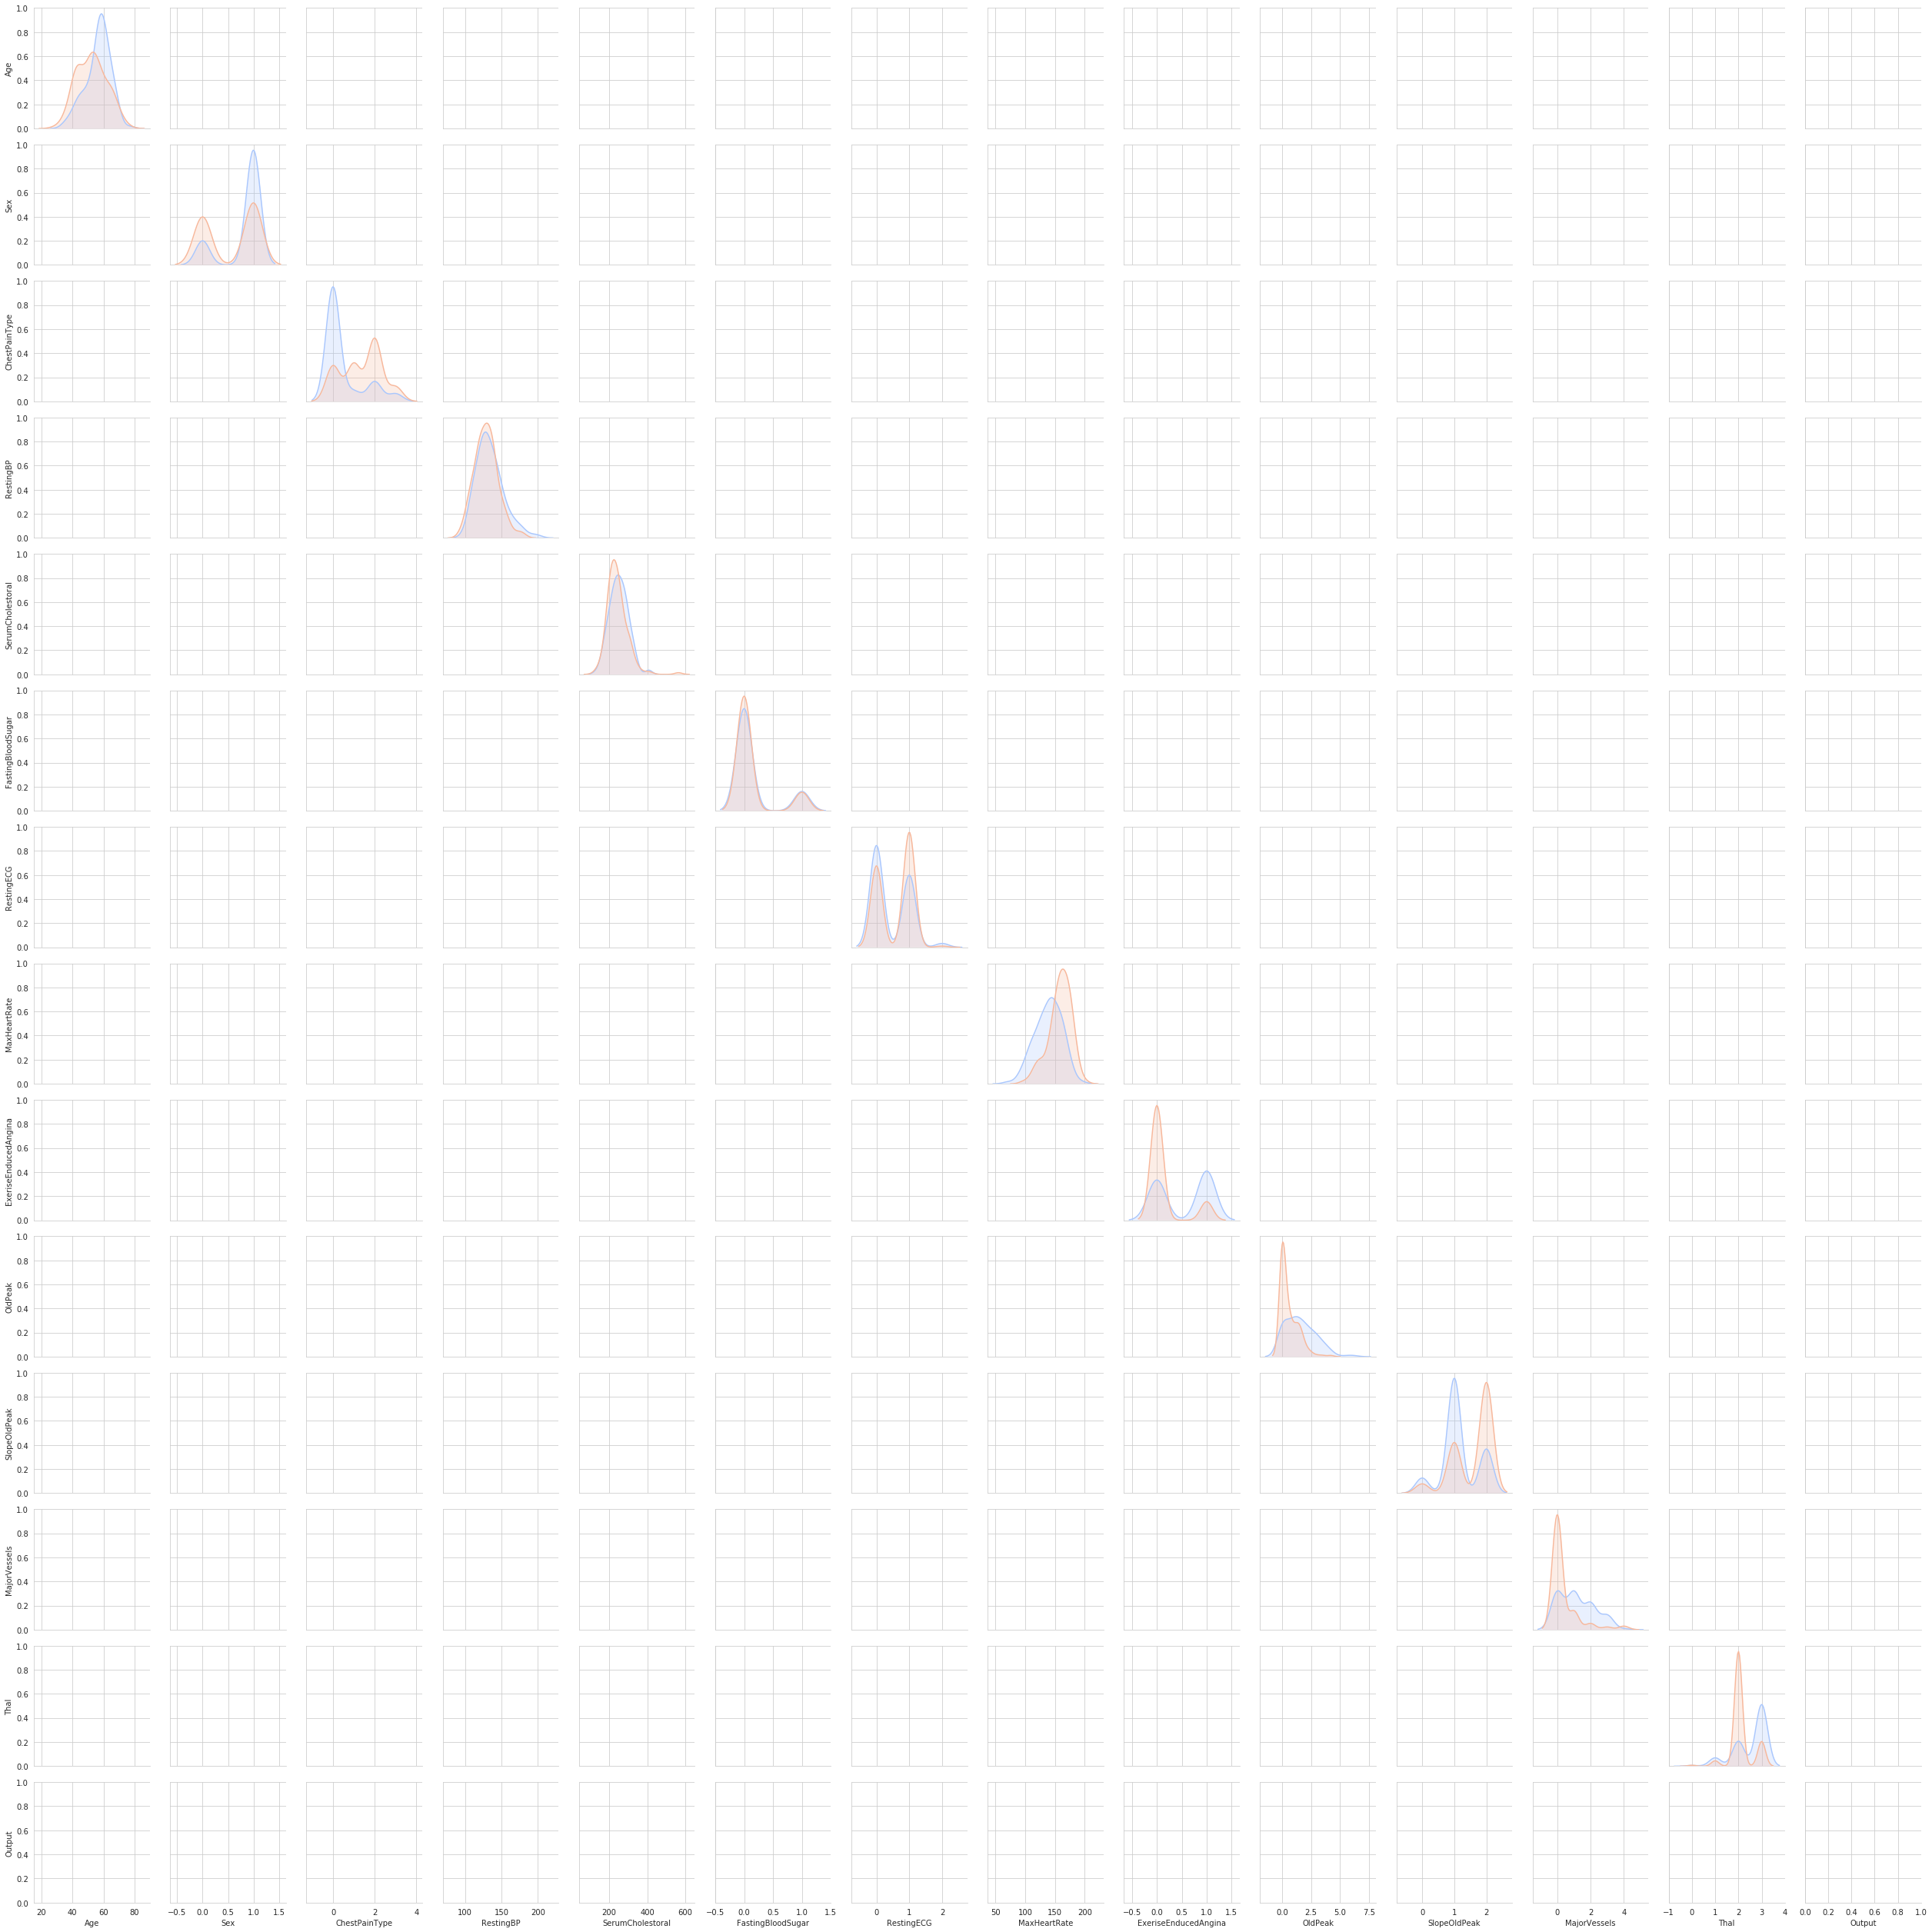

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(30,15))
sns.pairplot(df, hue='Output', palette='coolwarm')

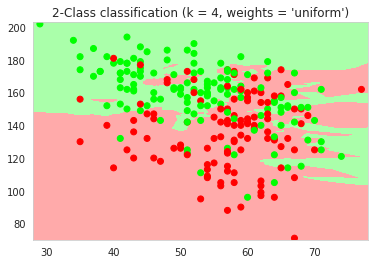

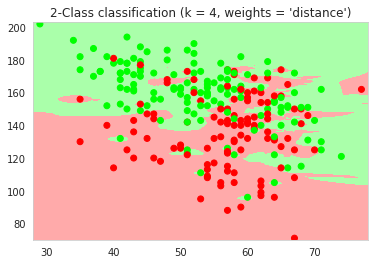

In [25]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 4


X = np.c_[X_train[:,0], X_train[:,7]].reshape(len(X_train),2) # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = y_train
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA' ])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

**3.K-Means**

In [26]:
from sklearn.cluster import KMeans
import numpy as np
X_train_s = np.c_[X_train[:,4], X_train[:,7]].reshape(len(X_train_s),2)
X_test_s =  np.c_[X_test_s[:,4], X_test_s[:,7]].reshape(len(X_test_s),2)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_s)
y_pred = kmeans.predict(X_test_s)
accuracy_score(y_test, y_pred)

0.4426229508196721

In [27]:
kmeans.cluster_centers_
X_train_s

array([[248., 158.],
       [295., 162.],
       [260., 185.],
       [227., 155.],
       [245., 143.],
       [294., 153.],
       [188., 113.],
       [283., 162.],
       [259., 130.],
       [216., 131.],
       [294., 106.],
       [199., 178.],
       [266., 171.],
       [187., 144.],
       [220., 152.],
       [211., 161.],
       [315., 125.],
       [286., 108.],
       [244., 154.],
       [200., 126.],
       [269., 121.],
       [229., 168.],
       [204., 143.],
       [236., 152.],
       [274., 150.],
       [239., 160.],
       [222., 186.],
       [269., 148.],
       [360., 151.],
       [175., 173.],
       [149., 126.],
       [239., 126.],
       [149., 125.],
       [335., 143.],
       [267., 167.],
       [303., 159.],
       [212., 157.],
       [253., 144.],
       [225., 146.],
       [354., 163.],
       [232., 164.],
       [180., 150.],
       [282., 142.],
       [305., 142.],
       [304., 162.],
       [195., 179.],
       [250., 179.],
       [268.,

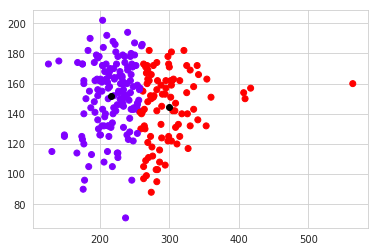

In [28]:
plt.scatter(X_train_s[:,0], X_train_s[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  

**4. Naive bayes**

In [29]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
     % (X_test.shape[0],(y_test != y_pred).sum()))


Number of mislabeled points out of a total 61 points : 12


In [30]:
from sklearn import metrics
y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8032786885245902


**5. SVM**

In [31]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.5901639344262295

**6. AdaBoost**

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=5)
search

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [33]:
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
clf.fit(X_train, y_train)  

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

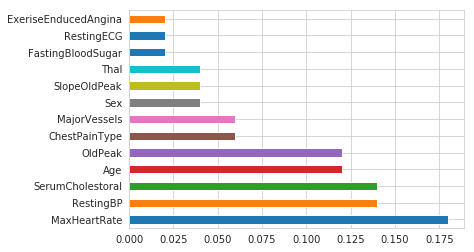

In [34]:
(pd.Series(clf.feature_importances_, index=df.columns[:-1]).nlargest(13).plot(kind='barh'))

In [35]:
score=np.mean(cross_val_score(clf,X_train,y_train,scoring='accuracy',cv=5,n_jobs=1))
score

0.8053333333333332